/tmp/ipython-input-1648677664.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


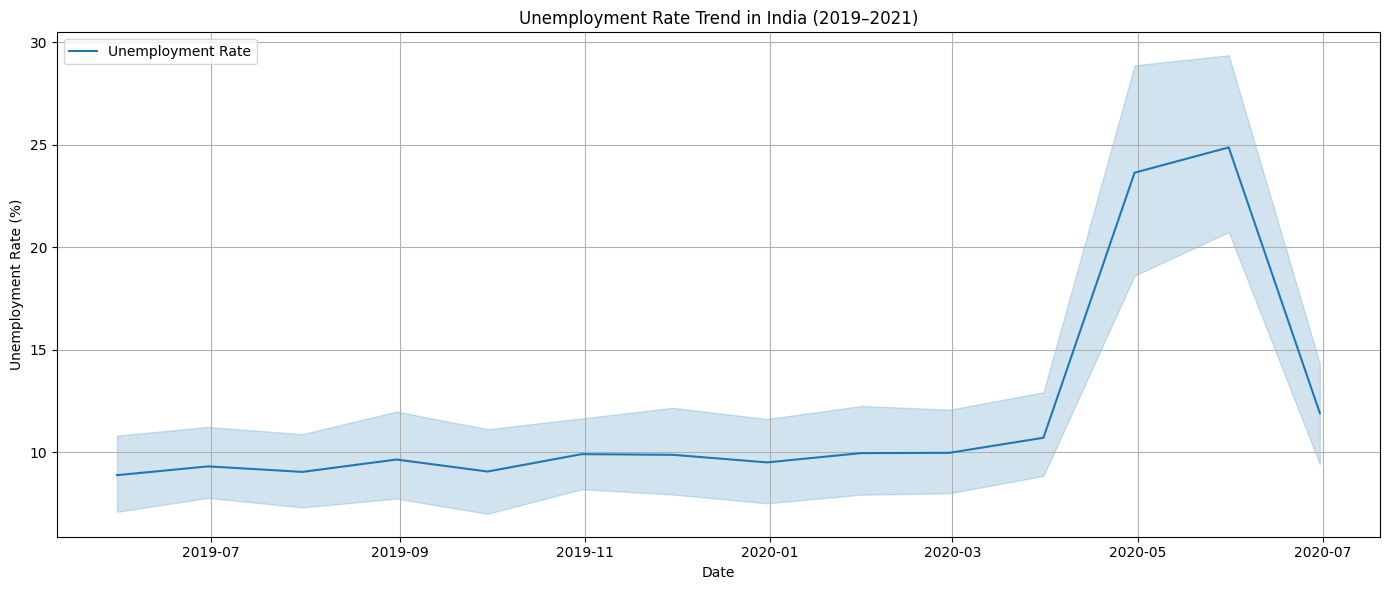

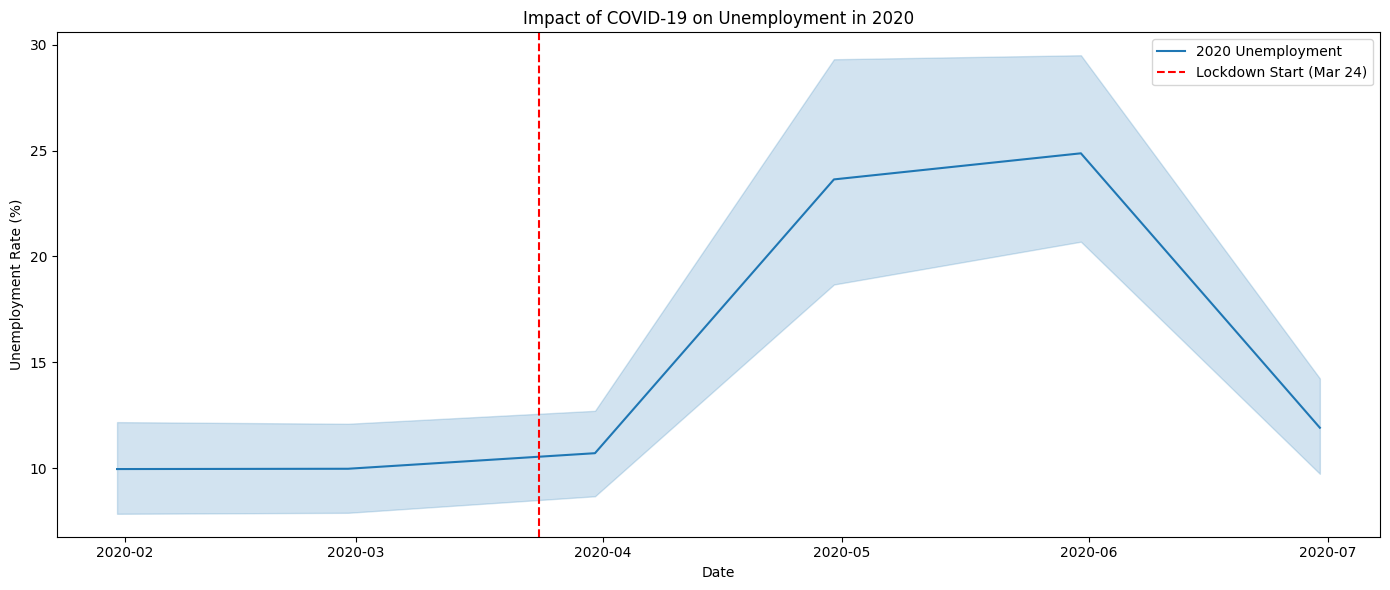

/tmp/ipython-input-1648677664.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")


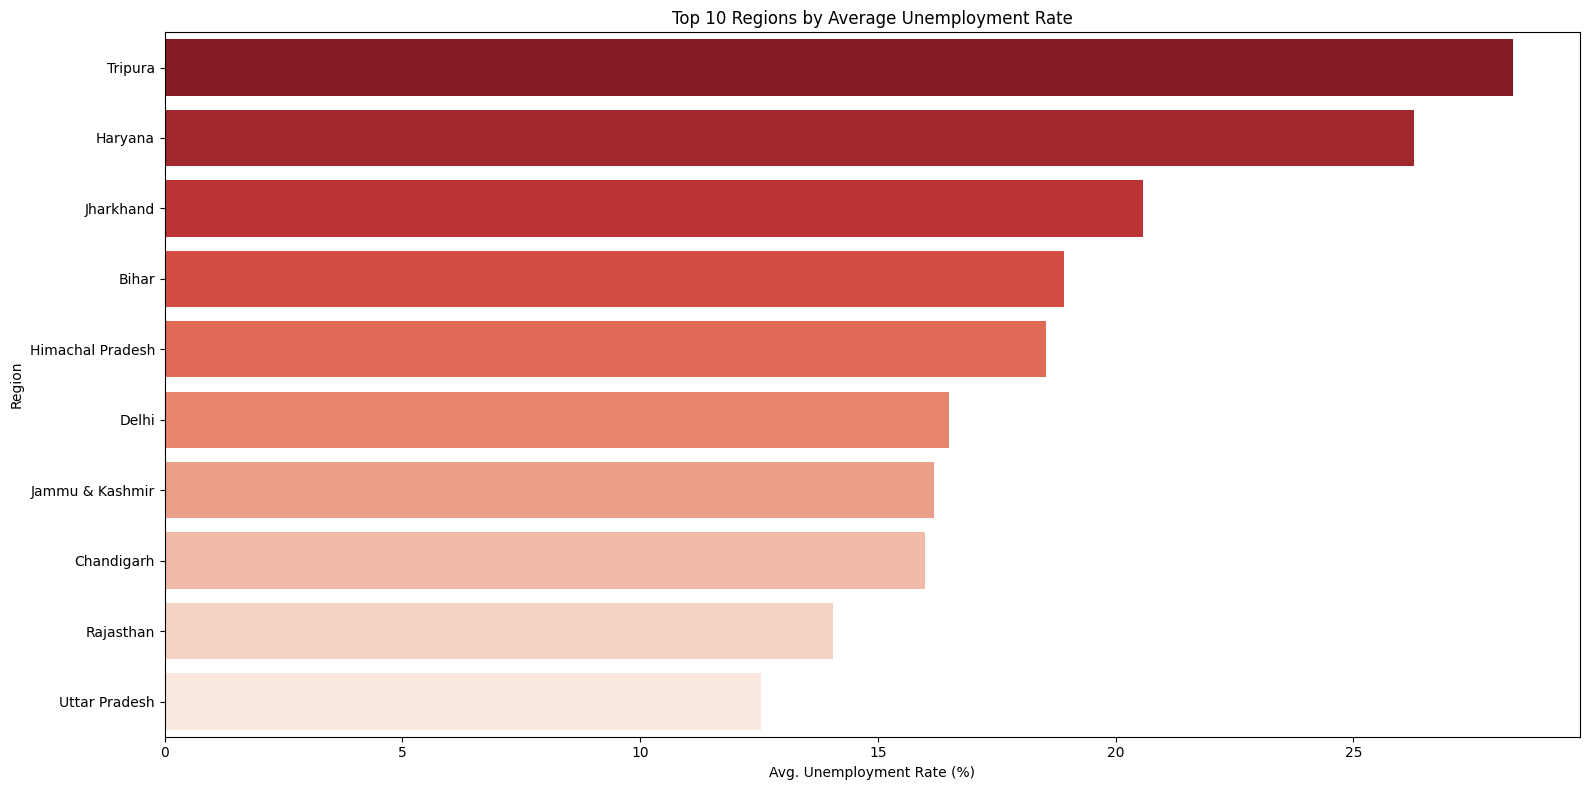

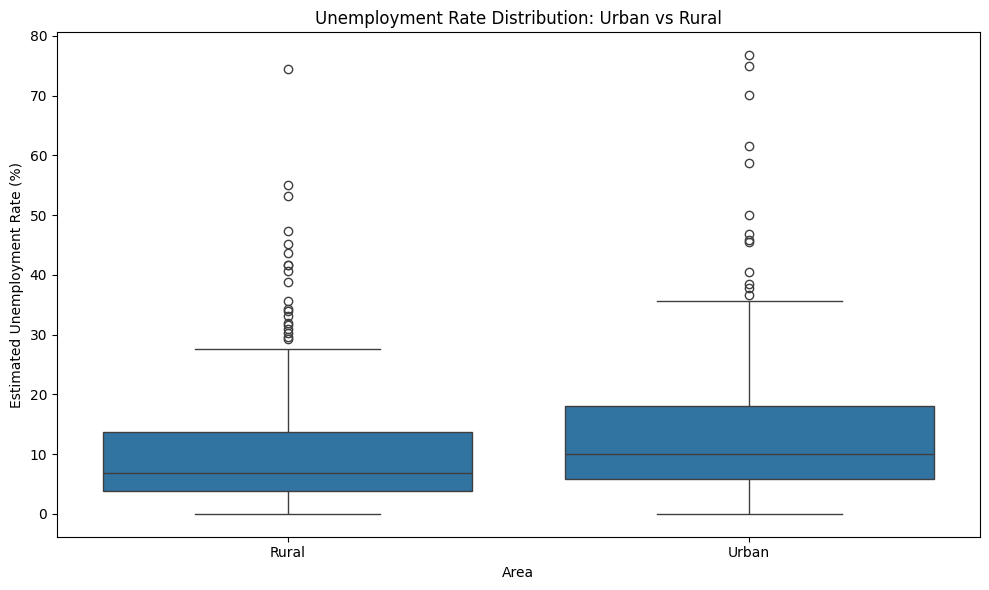

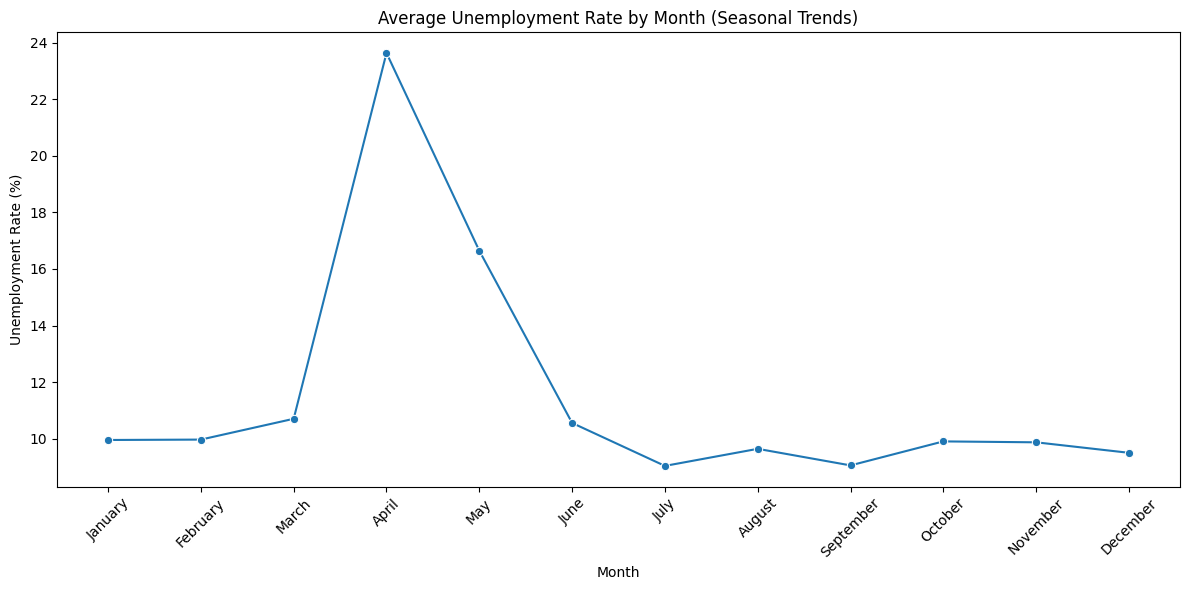

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Unemployment in India.csv")


df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


df.dropna(inplace=True)


df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()


plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', label='Unemployment Rate')
plt.title("Unemployment Rate Trend in India (2019–2021)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


covid_df = df[df['Year'] == 2020]
plt.figure(figsize=(14, 6))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate (%)', label='2020 Unemployment')
plt.title("Impact of COVID-19 on Unemployment in 2020")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.axvline(pd.Timestamp("2020-03-24"), color='red', linestyle='--', label='Lockdown Start (Mar 24)')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))
top_states = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")
plt.title("Top 10 Regions by Average Unemployment Rate")
plt.xlabel("Avg. Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Unemployment Rate Distribution: Urban vs Rural")
plt.tight_layout()
plt.show()


monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker="o")
plt.title("Average Unemployment Rate by Month (Seasonal Trends)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
